![Forage](https://cdn2.downdetector.com/static/uploads/logo/British_Airways_logo_1.png)

# **Project Description**

## **Overview**
    This project was done as a part of British Airways data science job simulation on Forage.

    Buildt a predictive model to help British Airways acquire customers before they embark on their holidays.

## **Workflow**

    

    



### **Import all the necessary libraries**

In [1]:
# Importing all the necessary libraries
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
plt.style.use('ggplot')

### **Data Collection and Preprocessing**

In [2]:
# Read the file as binary
with open("C:/Users/anita/Downloads/customer_booking(2).csv", 'rb') as f:
    result = chardet.detect(f.read())

# Get the encoding
encoding = result['encoding']

# Read the file using the detected encoding
df = pd.read_csv('C:/Users/anita/Downloads/customer_booking.csv', encoding=encoding)

In [3]:
# Checking for null values in the dataset
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
# Changing the columns containing str datatype into integer datatype
day_to_number = {'Mon': 1,'Tue': 2,'Wed': 3,'Thu': 4,'Fri': 5,'Sat': 6,'Sun': 7}
trip_to_number={'RoundTrip':1,'OneWay':0,'CircleTrip':2}
df['flight_day'] = df['flight_day'].map(day_to_number)
df['trip_type'] = df['trip_type'].map(trip_to_number)


In [5]:
# Dropping all the unnecessary columns
df.drop('sales_channel',axis=1,inplace=True)
df.drop('route',axis=1,inplace=True)
df.drop('booking_origin',axis=1,inplace=True)
df.drop('flight_duration',axis=1,inplace=True)
df.drop('flight_hour',axis=1,inplace=True)

In [6]:
# Selecting the dependent and independent variables
X=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [7]:
# Testing and training of dependent and independent variables
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Standerdise the X_train,X_test variables 
scaler=StandardScaler()
X_train[['num_passengers','trip_type','purchase_lead','length_of_stay','flight_day']]=scaler.fit_transform(X_train[['num_passengers','trip_type','purchase_lead','length_of_stay','flight_day']])
X_test[['num_passengers','trip_type','purchase_lead','length_of_stay','flight_day']]=scaler.fit_transform(X_test[['num_passengers','trip_type','purchase_lead','length_of_stay','flight_day']])

### **Model Development**

In [9]:
# Fitting random forest algorithm to the preprocessed and trained dependent and independent variables
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predicting the independent variable using the tested dependent variable 
y_pred=clf.predict(X_test)

### **Model Evaluation**


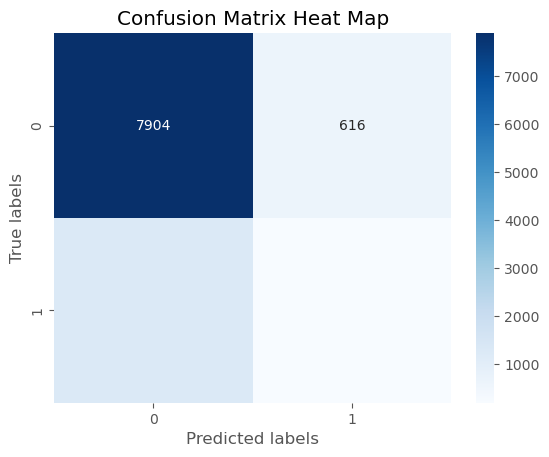

In [11]:
# Creating a confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heat Map')
plt.show()

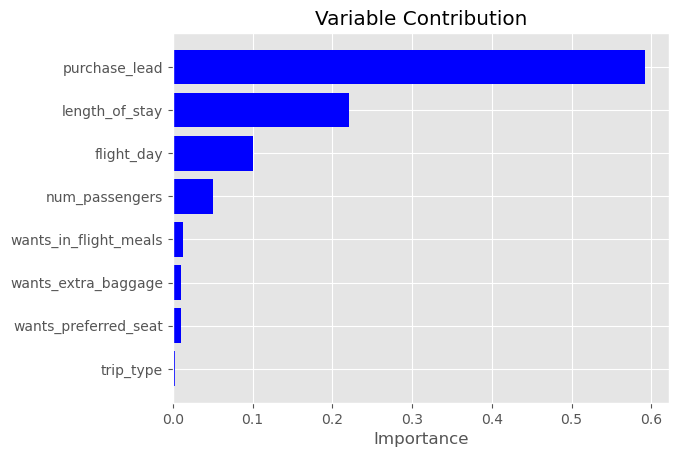

In [12]:
# Creating a plot to show the feature importances for each column
features=df.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
plt.title('Variable Contribution')
plt.barh(range(len(indices)),importances[indices],color='b')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

In [13]:
# Printing the classification report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      9192
           1       0.13      0.24      0.17       808

    accuracy                           0.81     10000
   macro avg       0.53      0.55      0.53     10000
weighted avg       0.86      0.81      0.83     10000

